# Week 4 - Linear Regression #


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(0.0, 10.1, 0.5) # create a dataset

In [3]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [4]:
y = 5.0 * x + 2.0

In [5]:
y

array([ 2. ,  4.5,  7. ,  9.5, 12. , 14.5, 17. , 19.5, 22. , 24.5, 27. ,
       29.5, 32. , 34.5, 37. , 39.5, 42. , 44.5, 47. , 49.5, 52. ])

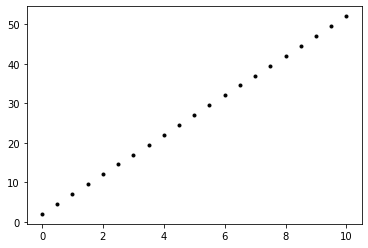

In [6]:
plt.plot(x,y, "k.")

In [7]:
np.polyfit(x,y,1) # does the regression 
# result is [m, c] where the equation of the line is
# y = mx + c

array([5., 2.])

In [8]:
np.polyfit(x[0:2],y[0:2],1) # If you are just checking part of the line

array([5., 2.])

***
$$ y = mx + c + \epsilon $$
   
m = slope  
c = intercept on y axis  
$\epsilon$ = error - in real world data
***

In [9]:
y = 5.0 * x + 2.0 + np.random.normal(0.0,1.0, len(x)) # adding random error

In [10]:
y

array([ 2.51804742,  4.73826362,  7.56067799, 10.57846418, 11.84499479,
       14.15347242, 17.73875016, 20.43624885, 22.46224591, 22.29444733,
       28.43879141, 31.27034775, 31.64987016, 34.65029549, 35.57257073,
       38.65782203, 41.36640158, 43.30363684, 46.86099457, 48.63999784,
       51.83878963])

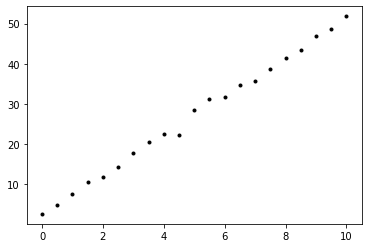

In [11]:
plt.plot(x,y,"k.")

In [12]:
m, c = np.polyfit(x,y,1)
m, c

(4.864365016027636, 2.657943048935972)

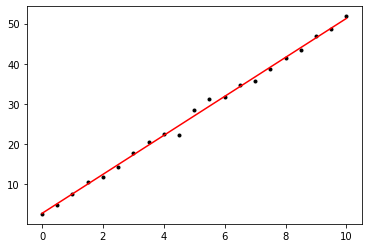

In [13]:
plt.plot(x,y,"k.")
plt.plot(x, m*x + c, "r-")

Note that we can easily calculate the best m and c ourselves:

In [14]:
# Calculate mean x and mean y
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y
x_zero = x - x_avg
y_zero = y - y_avg

#Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
#subract m times average x from average y
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(4.864365016027637, 2.657943048935973)

A more complex equation:
$$ y = 2x^2 + 5x + 1 + \epsilon$$

In [15]:
# Using a more complex equation
y = 2.0 * x * x - 5.0 * x + 1.0 + np.random.normal(0.0, 10.0, len(x))

In [16]:
y

array([ -4.48968421,  -7.15719833,  -5.29220387,  -3.57446758,
       -15.24992688,  15.15477457,  10.99135193,   3.37190179,
        19.5292448 ,  29.52794974,  14.36624145,  37.90364204,
        52.27552773,  49.77082283,  58.22369074,  85.15672496,
        81.78466261,  85.33725389, 113.38135028, 133.37361157,
       158.64330103])

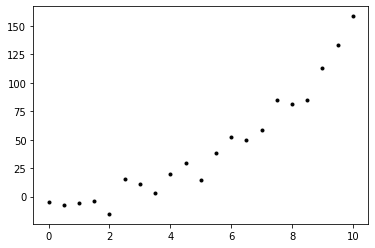

In [17]:
plt.plot(x,y,"k.")

In [18]:
#blindly try the regressio  - we get answers
m, c = np.polyfit(x,y,1) # Using polyfit here - will work, but is not a good model

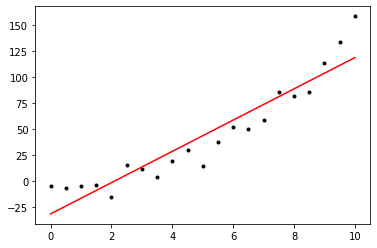

In [19]:
plt.plot(x,y,"k.")
plt.plot(x, m * x + c,"r-") # The line given by polyfit

You can see by plot above that this line is not a good fit to the data as there is a pattern to the "error" - a group above, a group below, a group above. This indicates that actual line is a curve.

In [20]:
a, b, c = np.polyfit(x,y,2) # using a x^2 value

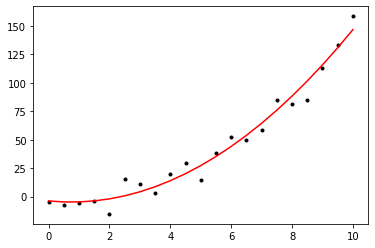

In [21]:
plt.plot(x,y,"k.")
plt.plot(x, a * x * x + b * x + c,"r-") # The line given by second polyfit

## Multi-Linear Regression ##
https://scikit-learn.org/stable/

In [22]:
# Import linear_model from sklearn
import sklearn.linear_model as ln

In [24]:
# Create a linear regression model instance
m = ln.LinearRegression()

In [25]:
# Let's use pandas to read a csv file and organise our data
import pandas as pd

In [29]:
# Read the iris csv from online
df = pd.read_csv("https://datahub.io/machine-learning/iris/r/iris.csv")

$$ petalwidth = t(sepallength) + u(sepalwidth) + v(petallength) + \epsilon$$

In [30]:
# Let's pretend we want to do linear regression on these variables to predict petal width
x = df[["sepallength", "sepalwidth", "petallength"]]

In [31]:
# Here's the petal width
y = df["petalwidth"]

In [32]:
# Ask our model to fit the data
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Here's our intercept
m.intercept_

-0.248723586024453

In [35]:
# Here's our coefficients, in order
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [36]:
# See how good our fit is
m.score(x,y) 
# R^2 Value

0.9380481344518986

In [38]:
# Calculate by hand
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = (( y - (t * x["sepallength"] + u * x["sepalwidth"] + v * x["petallength"]+c))**2).sum()
v = ((y - y.mean())**2).sum()

1-(u/v)

0.9380481344518986

## Using statsmodels ##

In [40]:
# Using statsmodels
import statsmodels.api as sm

# Tell statsmodels to include an intercept
xwithc = sm.add_constant(x)

# Create a model
msm = sm.OLS(y,xwithc) # Note y value first

# Fit the data
rsm = msm.fit()

# Print a summary
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.20e-88
Time:                        16:06:25   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      

## End ##